# Lab 6.02 - Regression analysis

In [ ]:
# Package imports
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz
from sklearn.linear_model import LinearRegression

## Exercise 2: Flemish agricultural and horticultural businesses

1. Use the dataset agriculture flanders.csv. The file contains data about agricultural and horticultural businesses in Flanders

    Source: Departement Landbouw en Visserij op basis van StatBel

In [ ]:
farms = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/agriculture%20flanders.csv', delimiter = ";", decimal=',')
# Show the first few records of the Data Frame
farms.head()

,year,number_of_farms,average_area_per_farm_(ha)
0,1980,75706,8.38
1,1981,73292,8.58
2,1982,71255,8.79
3,1983,69807,8.94
4,1984,68083,9.15


2. What are the datatypes for each of the columns.

In [ ]:
farms.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year                        41 non-null     int64  
 1   number_of_farms             41 non-null     int64  
 2   average_area_per_farm_(ha)  41 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.1 KB


3. Draw a scatter plot of the number of farms versus the year.


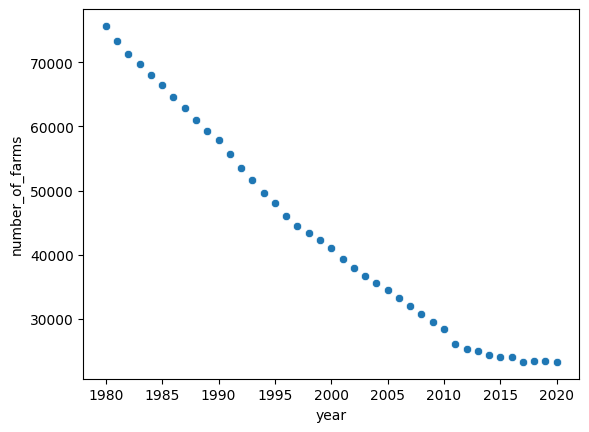

In [ ]:
sns.scatterplot(data=farms, x='year', y='number_of_farms');

4. Is there a positive / negative relationship between year and number_of_farms?

    $R = -0.9861066349492859$

In [ ]:
cor = np.corrcoef(
    farms.year,
    farms.number_of_farms)[0][1]
print(cor)

-0.9861066349492859


6. Is there a strong relationship between year and 'number_of_farms'?

    $R^2 = 0.9724062954910041$

In [ ]:
print(cor**2)
# 97 % van de variantie in de afh veranderlijke wordt verklaard door de afh veanderlijke

0.9724062954910041


7. Draw a scatter plot of the 'average_area_per_farm_(ha)' versus the year.

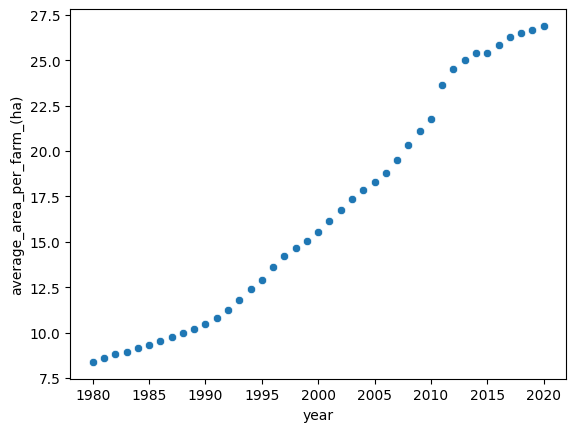

In [ ]:
sns.scatterplot(data=farms, x='year', y='average_area_per_farm_(ha)');

8. What will be the 'average_area_per_farm_(ha)' in 2035?

Average area in 2035 = 34.91987804878045

In [ ]:
x=farms.year
y=farms['average_area_per_farm_(ha)']

a,b=np.polyfit(x,y,1)
print(f"y = {a} * x + {b}")
print(f"Gemiddelde opp = {a * 2035 + b}")


y = 0.5242334494773592 * x + -1031.8951916376452
Gemiddelde opp = 34.919878048780674


In [ ]:
# andere methode

from sklearn.linear_model import LinearRegression

x=farms.year.values.reshape(-1,1)
y=farms['average_area_per_farm_(ha)']

model = LinearRegression().fit(x, y)

print(f"Regression line: ŷ = {model.intercept_:.4f} + {model.coef_[0]:.4f} x")
print(f"Gemiddelde opp = {model.coef_[0] * 2035 + model.intercept_}")

print(f"Gemiddelde opp = {model.predict([[2035]])}")

Regression line: ŷ = -1031.8952 + 0.5242 x
Gemiddelde opp = 34.91987804878045
Gemiddelde opp = [34.91987805]


8. Calculate the total agricultural area for each year.   
Calculate for each year the change of the total area relative to 1980.  
Make a plot.

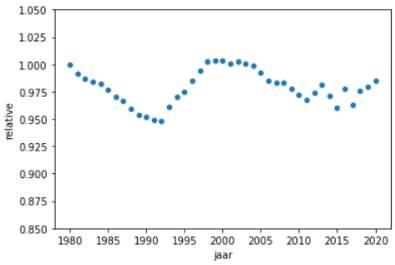


634416.28


[(0.0, 1.1)]

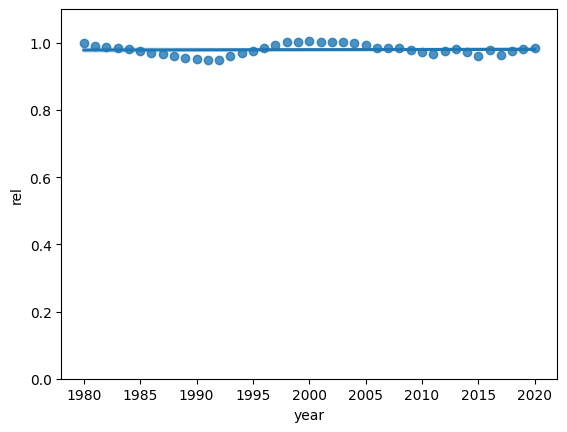

In [ ]:
farms['total_area'] = farms['number_of_farms'] * farms['average_area_per_farm_(ha)']
farms.head()
area_1980 = farms.iloc[0,3]
print(area_1980)
farms['rel'] = farms['total_area'] / area_1980
farms.head()
g = sns.regplot(data=farms,x='year',y='rel')
g.set(ylim = [0,1.1])

In [ ]:
# Python function numpy.corrcoef() - returns a matrix, like numpy.cov()
cor = np.corrcoef(
    farms.year,
    farms.rel)[0][1]
print(f"R ≈ {cor:.4f}")

R ≈ 0.0379
